In [8]:
options(repr.plot.width=8, repr.plot.height=5, jupyter.plot_mimetypes='image/svg+xml')
source('common.r')
out <- function(obj) write(obj, stdout())

In [6]:
d <- data.retwis(where="(name like '%v0.30%' and nclients = 4)")
out("rows: " + nrow(d))

d <- subset(d, cc_ph %in% c(RW+PH, COMM, COMM+PH, COMB+PH, NOTXN))
d$cc_ph <- factor(d$cc_ph, levels = rev(c(RW+PH, COMM, COMM+PH, COMB+PH, NOTXN)))

d$x <- d$nthreads * num(d$nclients)
d$label <- d$nthreads * num(d$nclients) + "x" + d$rate
d$facet <- with(d, workload) # + "\n" + timeout_scaling)

# d$retwis_txn_count <- d$retwis_follow_count + d$retwis_newuser_count + d$retwis_post_count + d$retwis_repost_count + d$retwis_timeline_count / 10
# d$throughput <- d$retwis_txn_count * num(d$nclients) / d$total_time

d <- subset(d, async == 0 & txn_failed < 200 & total_time > 60 & total_time < 65 & (phasing == 'on' | disable_txns == 1))

The following `from` values were not present in `x`: better#0, better#1
The following `from` values were not present in `x`: better#0, better#1
The following `from` values were not present in `x`: better#0#off#0, better#1#off#0, better#0#on#0, better#1#on#0
The following `from` values were not present in `x`: simple:1
The following `from` values were not present in `x`: update_heavy


rows: 359


In [10]:
sql("SELECT DISTINCT nclients, nthreads, mix, rate, alpha, scale FROM d")

,nclients,nthreads,mix,rate,alpha,scale
1,4,4,geom_repost,50,-1,16
2,4,4,2read2heavy,50,-1,16
3,4,8,geom_repost,50,-1,16
4,4,8,2read2heavy,50,-1,16
5,4,16,geom_repost,50,-1,16
6,4,16,2read2heavy,50,-1,16
7,4,32,geom_repost,50,-1,16
8,4,32,2read2heavy,50,-1,16
9,4,64,geom_repost,50,-1,16
10,4,64,2read2heavy,50,-1,16


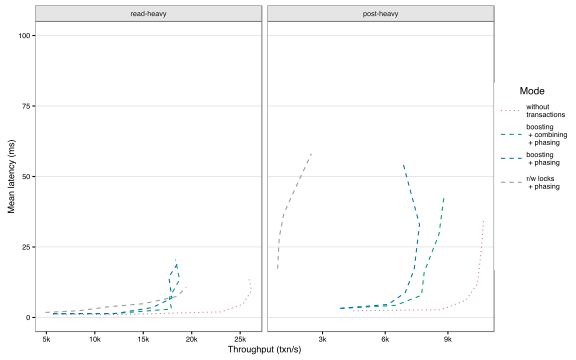

In [9]:
  ggplot(d, aes(
    x = throughput,
    y = avg_latency_ms,
    group = cc_ph, fill = cc_ph, color = cc_ph, linetype = cc_ph
  ))+
  xlab('Throughput (txn/s)')+ylab('Mean latency (ms)')+
  # geom_point()+
  # geom_text(aes(label=label), size=1.7)+
  # scale_x_continuous(labels=si.labels())+
  scale_x_continuous(labels = function(x){ x/1000+'k' })+
  # geom_point()+
  geom_mean_path(d, throughput, avg_latency_ms, .(x,facet,cc,phasing,cc_ph))+
  expand_limits(y=0)+
  facet_wrap(~facet, scales="free_x")+
  # cc_scales()+phasing.linetype()+
  cc_ph_scales()+
  coord_cartesian(ylim=c(0,100))+
  my_theme() #+theme(legend.position='bottom')
